# Applied Machine Learning (2023), exercises


## General instructions for all exercises

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Remove also line 

> raise NotImplementedError()

**Do not change other areas of the document**, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manually graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks are text in markdown format. It may contain text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, validate and submit your solution using the nbgrader tools from the `Nbgrader/Assignment List`-menu.


## Soil moisture prediction (Regression)
A remote sensing system provides spectral images of soil, which is used to predict the soil moisture. The spectral data contains a matrix of reflected ligth at different wavelengts from one location. At the same time, the true soil moisture and temperature were measured with an accurate reference method. 

## Task 1


### Read the data

- Read a CSV-file, called `soilmoisture_dataset.csv`
- Extract all the columns which has a wavelength number as column header to your design matrix X
- Use the `soil_moisture` -column as dependent variable, y


### Make training set and test set
Separate your data X and y to training set (X_train, y_train) which contains 75% of the data and to the test set X_test, y_test which contains 25% of the data.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
#READ THE FILE
data = pd.read_csv('soilmoisture_dataset.csv')

#EXTRACT ALL THE COLUMNS WHICH HAVE THE WAVELENGTH NUMBER AS COLUMN HEADER TO DESIDGN MATRIX X
X = data.iloc[:, 4:]

# 3. Extract the 'soil_moisture' column for y
y = data['soil_moisture']

# Optionally, you can view the first few rows of X and y to verify
print("First few rows of X:")
print(X.head())
print("\nFirst few rows of y:")
print(y.head())

#MAKE TRAINING SET AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

First few rows of X:
        454       458       462       466       470       474       478  \
0  0.082131  0.055863  0.050047  0.047925  0.047498  0.046464  0.046669   
1  0.079510  0.055326  0.049116  0.047579  0.046745  0.046833  0.046329   
2  0.080599  0.054065  0.049150  0.047537  0.046525  0.046032  0.046276   
3  0.078024  0.054972  0.049052  0.047920  0.046883  0.046775  0.046835   
4  0.079973  0.055335  0.049314  0.047373  0.047028  0.046963  0.046763   

        482       486       490  ...       914       918       922       926  \
0  0.046834  0.047469  0.048608  ...  0.152845  0.152615  0.152927  0.154240   
1  0.047021  0.047660  0.048272  ...  0.152715  0.153102  0.153551  0.153590   
2  0.046886  0.047230  0.048611  ...  0.152362  0.152158  0.153204  0.153942   
3  0.046996  0.047565  0.048465  ...  0.153281  0.153990  0.154499  0.155012   
4  0.047051  0.048083  0.048178  ...  0.152803  0.153085  0.153295  0.154230   

        930       934       938       942      

In [ ]:
errorfound=False
require=('X', 'y')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True


## Task 2

- Study the data, select a regression algorithm for predicting the moisture
- Train the regression algorithm using the training data.
- Use cross validation to test the performance of the regressor and tune it's parameters
- Finally test the regressor with the test set
- Report the score (= $R^2$ = coefficient of determination) of the regressor in the training set, cross validation and in the test set
- Plot the predicted moisture against the known moisture
- What does the $R^2$ score tells? 
- What is your opinion of the performance? Is there signs of overfitting?

Accuracy in the training set: 0.993380
Accuracy in cross-validation: 0.943053
Accuracy in the test set: 0.932454


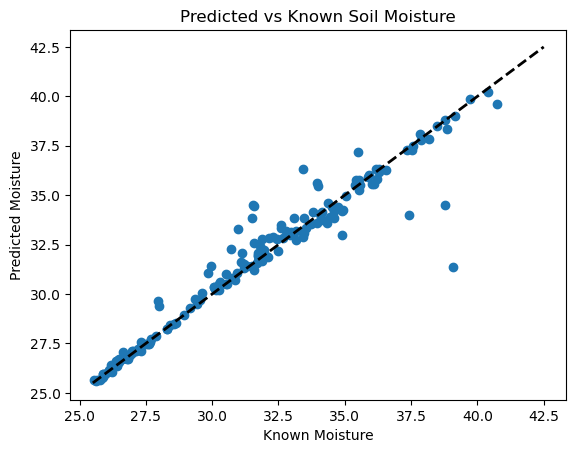

The R² score indicates the proportion of variance in the dependent variable that is predictable from the independent variables.
A high R² score on both training and test sets suggests good model performance.
If the training score is significantly higher than the test score, it may indicate overfitting.


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd

model = RandomForestRegressor(random_state=42)

# Parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Evaluate on the training set
train_score = best_model.score(X_train, y_train)

# Cross-validation score
cv_score = grid_search.best_score_

# Evaluate on the test set
y_pred = best_model.predict(X_test)
test_score = r2_score(y_test, y_pred)

# Reporting the scores
print("Accuracy in the training set: %f" % train_score)
print("Accuracy in cross-validation: %f" % cv_score)
print("Accuracy in the test set: %f" % test_score)

# Plotting Predicted vs Known Moisture
plt.scatter(y_test, y_pred)
plt.xlabel('Known Moisture')
plt.ylabel('Predicted Moisture')
plt.title('Predicted vs Known Soil Moisture')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

# Interpretation
print("The R² score indicates the proportion of variance in the dependent variable that is predictable from the independent variables.")
print("A high R² score on both training and test sets suggests good model performance.")
print("If the training score is significantly higher than the test score, it may indicate overfitting.")


In [ ]:
# The coefficient of determination should be above 0.9 in the
# test set depending on your regression algorithm and parameters

errorfound=False
require=('train_score', 'cv_score', 'test_score')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True

assert(train_score>0.85), "Try again, if you can get better accuracy by tuning the regressor parameters"


points

## Task 3, Select the best features

Like it often is, some features are more important for regression than the others. 

- Study which features are the most important for predicting the moisture. If you used Extratrees regressor or GradientBoostedTree regressor, then you can use the .feature_importances vector. Another option is to use LASSO or Elastic net models and SelectFromModel to reduce unimportant features.
- Plot a bar graph to visualize the importance of features
- To check the importance of a single variable, plot a scatter plot using true moisture in x-axis and the value of the most important variable in y-axis.
- Study the shape of the dependency. Is it linear or nonlinear?
- Make a vector `features` which contains the names of the 10 most important features in decreasing order

Name your variables according to the following table, in order to make the autograder tests to work:

| Variable | Name |
| -------- | ------|
| Best features | `features` |
| Barplot | `barplot` |
| Scatter plot  | `scatterplot` |

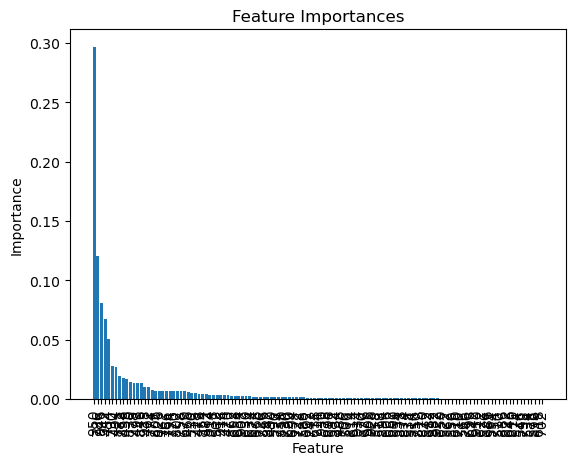

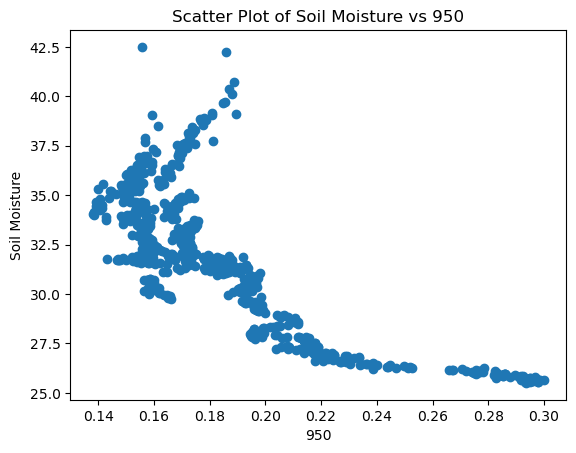

Top 10 features: ['950', '786', '946', '942', '454', '790', '494', '782', '858', '458']


In [5]:
#CREATE REGRESSION MODEL WITH RANDOM FOREST
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Check if the model has the attribute 'feature_importances_'
if hasattr(model, 'feature_importances_'):
    # Extract Feature Importances
    feature_importances = model.feature_importances_

    # Create a Bar Graph of Feature Importances
    feature_names = X.columns
    importances = pd.Series(feature_importances, index=feature_names)
    sorted_importances = importances.sort_values(ascending=False)

    # Plotting the Barplot
    x = range(len(sorted_importances))
    barplot = plt.figure()
    plt.bar(x, sorted_importances)
    plt.xticks(x, sorted_importances.index, rotation='vertical')
    plt.title('Feature Importances')
    plt.ylabel('Importance')
    plt.xlabel('Feature')
    plt.show()

    # Scatter Plot for the Most Important Feature
    most_important_feature = sorted_importances.index[0]
    scatterplot = plt.figure()
    plt.scatter(data[most_important_feature], y)
    plt.title(f'Scatter Plot of Soil Moisture vs {most_important_feature}')
    plt.xlabel(most_important_feature)
    plt.ylabel('Soil Moisture')
    plt.show()

    # Identify and Store Top 10 Features
    features = sorted_importances[:10].index.tolist()

    # Output the names of the top 10 features
    print("Top 10 features:", features)
else:
    print("The model does not support feature importances.")

In [ ]:
errorfound=False
require=('features', 'barplot', 'scatterplot')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True

assert(len(features)==10), "Please put the names of three most important features in list features!"

points